<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw1_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/D3.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [ ]:
# Separate features and labels
x1 = df.values[:, 0]  # get input value x1
x2 = df.values[:, 1]  # get input value x2
x3 = df.values[:, 2]  # get input value x3

y = df.values[:, 3]  # get output y
m = len(y)  # Number of training examples

print('m = ', m)

m =  100


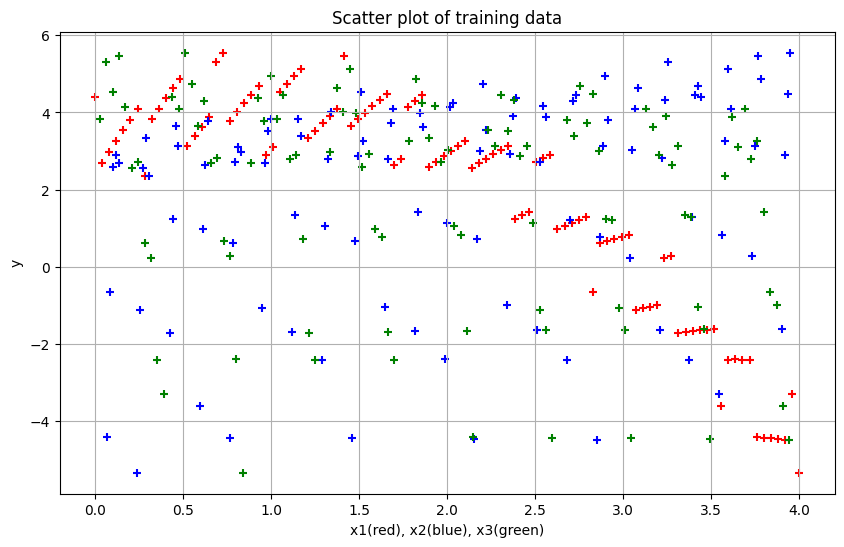

In [ ]:
# Scatter plot
plt.scatter(x1, y, color='red', marker='+')
plt.scatter(x2, y, color='blue', marker='+')
plt.scatter(x3, y, color='green', marker='+')


# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('x1(red), x2(blue), x3(green)')
plt.ylabel('y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [ ]:
X_0 = np.ones((m, 1))

X_1 = x1.reshape(m, 1) #input variable: x1

X = np.hstack((X_0, X_1)) #input vector
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
#initalize theta
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_loss(X, y, theta):
    """
    Compute loss for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the loss
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the loss for theta values
loss = compute_loss(X, y, theta)
print('The loss for given values of theta_0 and theta_1 =', loss)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        loss_history[i] = compute_loss(X, y, theta)

    return theta, loss_history

In [ ]:
#run gradient decent

theta = [0., 0.] #initialize
iterations = 300
alpha = 0.1

theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 5.92092354 -2.03560232]
loss_history = [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.10023842 1.09518757 1.09035808 1.08574025


$h(x) = \theta_1*x + \theta_0$
with $ \theta_1 = -2.03560232$ and $\theta_0 = 5.92092354$

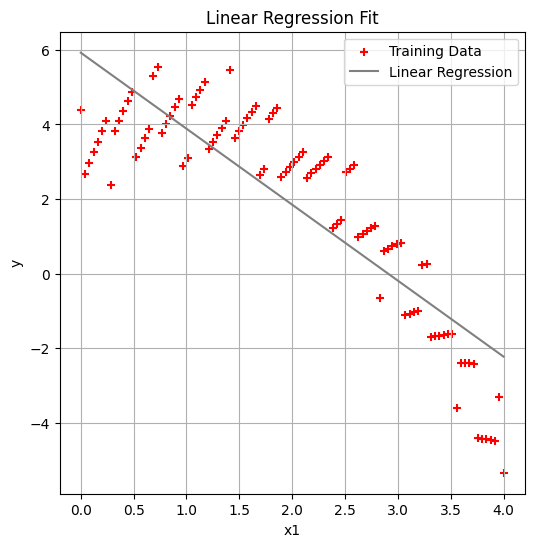

In [ ]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='gray', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


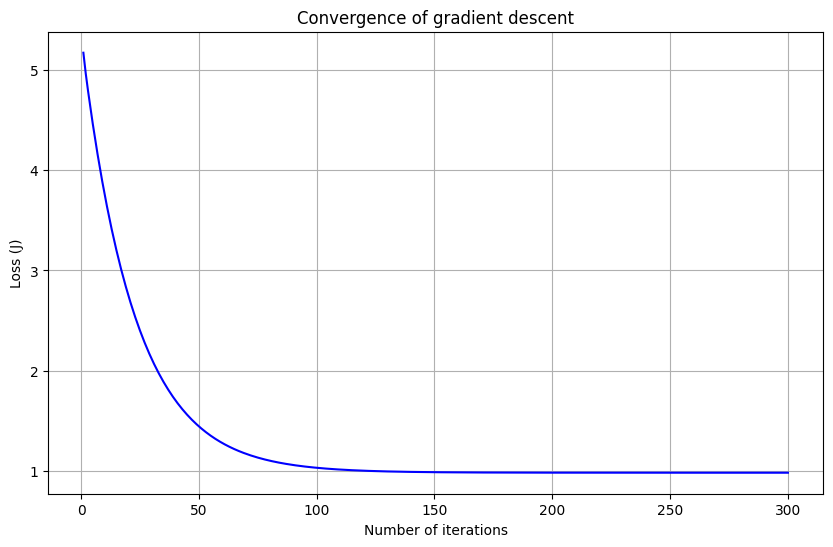

In [ ]:
#plot the convergence of gradient decent
plt.plot(range(1, iterations + 1), loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
#setup X matrix for input variable x2

X_1 = x2.reshape(m, 1) #input variable x2

X = np.hstack((X_0, X_1)) #input vector


In [ ]:
#run gradient decent

theta = [0., 0.] #initialize
iterations = 200
alpha = 0.1

theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [0.73095934 0.559593  ]
loss_history = [3.90731819 3.66528504 3.62832072 3.62197105 3.62022283 3.61919582
 3.61830993 3.6174772  3.6166831  3.61592412 3.61519844 3.61450458
 3.61384113 3.61320675 3.61260018 3.61202019 3.61146562 3.61093535
 3.61042832 3.60994351 3.60947995 3.6090367  3.60861288 3.60820763
 3.60782015 3.60744964 3.60709538 3.60675663 3.60643274 3.60612304
 3.60582691 3.60554376 3.60527302 3.60501414 3.60476661 3.60452993
 3.60430362 3.60408723 3.60388032 3.60368248 3.60349331 3.60331243
 3.60313948 3.6029741  3.60281598 3.60266478 3.60252021 3.60238198
 3.6022498  3.60212342 3.60200258 3.60188703 3.60177654 3.6016709
 3.60156989 3.60147331 3.60138095 3.60129265 3.60120821 3.60112748
 3.60105028 3.60097647 3.60090589 3.6008384  3.60077388 3.60071218
 3.60065318 3.60059677 3.60054283 3.60049126 3.60044194 3.60039479
 3.60034971 3.60030659 3.60026537 3.60022596 3.60018827 3.60015224
 3.60011778 3.60008483 3.60005333 3.60002321 3.59999441 3.59996687
 

$h(x) = \theta_1*x + \theta_0$
with $ \theta_1 = 0.559593$ and $\theta_0 = 0.73095934$

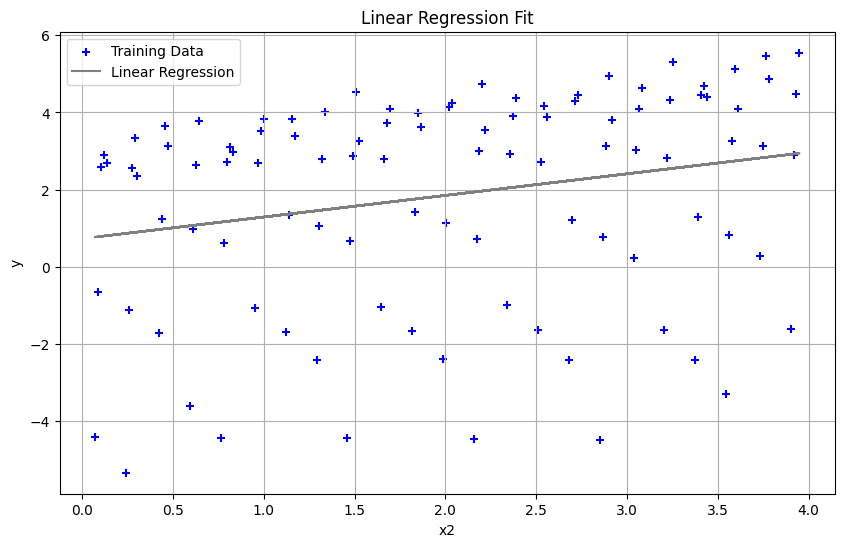

In [ ]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='blue', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='gray', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


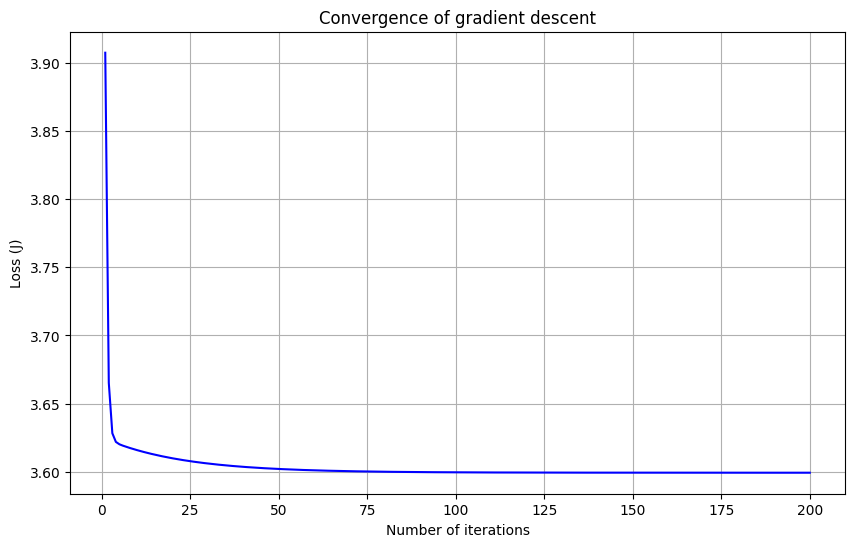

In [ ]:
#plot the convergence of gradient decent
plt.plot(range(1, iterations + 1), loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
# #setup X matrix for input variable x3

X_1 = x3.reshape(m, 1) #input variable x3

X = np.hstack((X_0, X_1)) #input vector

In [ ]:
#run gradient decent

theta = [0., 0.] #initialize
iterations = 300
alpha = 0.1

theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 2.86852254 -0.51933612]
loss_history = [4.66843939 4.49602325 4.43685075 4.39757676 4.3628731  4.3301743
 4.29900486 4.26923359 4.240788   4.21360745 4.18763542 4.16281813
 4.13910424 4.11644469 4.09479259 4.07410317 4.05433361 4.03544302
 4.01739232 4.00014417 3.98366289 3.96791437 3.95286604 3.93848678
 3.92474683 3.91161776 3.89907242 3.88708486 3.87563028 3.86468497
 3.8542263  3.84423263 3.83468329 3.82555851 3.81683943 3.80850801
 3.80054701 3.79293996 3.78567113 3.77872547 3.77208862 3.76574686
 3.75968705 3.75389666 3.74836372 3.74307678 3.7380249  3.73319763
 3.72858498 3.72417742 3.71996582 3.71594147 3.71209604 3.70842159
 3.7049105  3.70155552 3.69834971 3.69528643 3.69235934 3.6895624
 3.68688981 3.68433604 3.68189582 3.67956409 3.67733603 3.67520703
 3.67317269 3.67122879 3.66937133 3.66759645 3.66590048 3.66427991
 3.6627314  3.66125173 3.65983785 3.65848684 3.65719589 3.65596234
 3.65478363 3.65365733 3.6525811  3.65155273 3.65057007 3.64963111


$h(x) = \theta_1*x + \theta_0$
with $ \theta_1 = -0.51933612$ and $\theta_0 = 2.86852254$

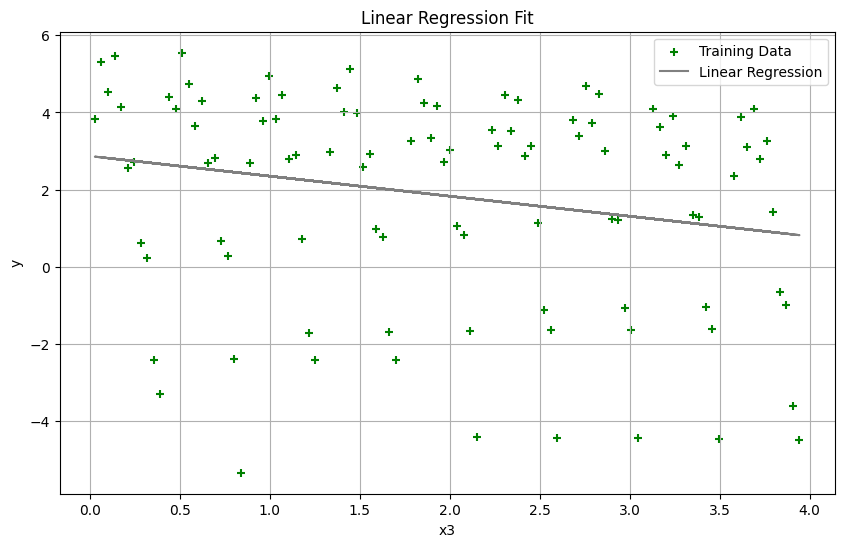

In [ ]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='green', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='gray', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x3')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

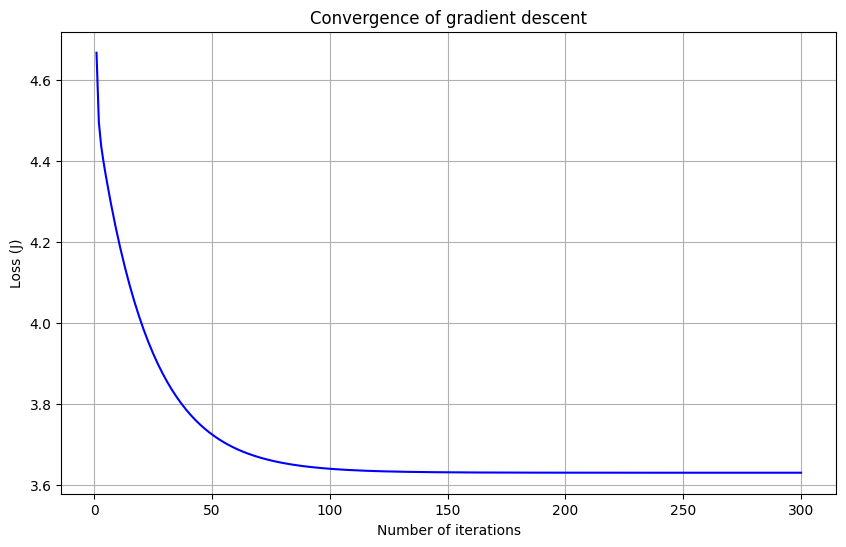

In [ ]:
#plot the convergence of gradient decent
plt.plot(range(1, iterations + 1), loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()